In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
# read tsv
df_z3 = pd.read_csv(
    "/workspaces/plant-rl/data/calibration/RL_colourspectraz3.txt", sep="\t"
)
df_z12 = pd.read_csv(
    "/workspaces/plant-rl/data/calibration/RL_colourspectraz12.txt", sep="\t"
)

In [44]:
# drop last column [-1]
df_z3 = df_z3.drop(df_z3.columns[-1], axis=1)
df_z12 = df_z12.drop(df_z12.columns[-1], axis=1)

In [45]:
# df_z3 drop first column [1]
df_z3 = df_z3.drop(df_z3.columns[1], axis=1)
df_z12 = df_z12.drop(df_z12.columns[1], axis=1)

In [46]:
df_z3

,S17176_1:101,Capture_1:201,Unnamed: 3,Capture_2:202,Unnamed: 5,Capture_3:203,Unnamed: 7,Capture_4:204,Unnamed: 9,Capture_5:205,Unnamed: 11,Capture_6:206,Unnamed: 13
0,337.498,337.498,-1.0,337.498,-1.0,337.498,1.0,337.498,-1.0,337.498,-3,337.498,4.0
1,337.947,337.947,-1.0,337.947,2.0,337.947,-1.0,337.947,4.0,337.947,4,337.947,3.0
2,338.397,338.397,5.0,338.397,3.0,338.397,1.0,338.397,2.0,338.397,3,338.397,0.0
3,338.846,338.846,-1.0,338.846,-1.0,338.846,0.0,338.846,5.0,338.846,-1,338.846,1.0
4,339.295,339.295,-2.0,339.295,0.0,339.295,-2.0,339.295,-1.0,339.295,-10,339.295,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,823.322,823.322,0.0,823.322,-3.0,823.322,1.0,823.322,-1.0,823.322,1,823.322,4.0
1020,823.811,823.811,-2.0,823.811,1.0,823.811,0.0,823.811,-3.0,823.811,2,823.811,3.0
1021,824.301,824.301,-2.0,824.301,2.0,824.301,-1.0,824.301,-1.0,824.301,-4,824.301,-1.0
1022,824.791,824.791,6.0,824.791,3.0,824.791,0.0,824.791,1.0,824.791,1,824.791,7.0


In [47]:
# drop columns 1, 3, 5, ...
def drop_columns(df, columns_to_drop):
    return df.drop(df.columns[columns_to_drop], axis=1)


df_z3 = drop_columns(df_z3, range(1, df_z3.shape[1], 2))
df_z12 = drop_columns(df_z12, range(1, df_z12.shape[1], 2))

In [48]:
# Assign to the Columns names: Blue, Cool White, Warm White, Orange Red, Red, Far Red
df_z3.columns = [
    "Wavelength",
    "Blue",
    "Cool White",
    "Warm White",
    "Orange Red",
    "Red",
    "Far Red",
]
df_z12.columns = [
    "Wavelength",
    "Blue",
    "Cool White",
    "Warm White",
    "Orange Red",
    "Red",
    "Far Red",
]

In [49]:
df_z12

,Wavelength,Blue,Cool White,Warm White,Orange Red,Red,Far Red
0,337.498,3.0,1,-1.0,0.0,0.0,0.0
1,337.947,2.0,-1,3.0,-1.0,0.0,-1.0
2,338.397,5.0,4,7.0,2.0,7.0,4.0
3,338.846,0.0,-1,1.0,-2.0,1.0,1.0
4,339.295,-4.0,-4,-1.0,-8.0,-4.0,-6.0
...,...,...,...,...,...,...,...
1019,823.322,-1.0,3,0.0,2.0,1.0,2.0
1020,823.811,4.0,1,2.0,0.0,0.0,2.0
1021,824.301,-4.0,-6,1.0,-1.0,-1.0,2.0
1022,824.791,2.0,-1,0.0,7.0,2.0,3.0


In [50]:
def plot_unnamed_columns(df, wavelength_col=None, title="Spectra"):
    # If wavelength_col is not specified, use the first column (assumed to be wavelength)
    if wavelength_col is None:
        wavelength_col = df.columns[0]

    plt.figure(figsize=(10, 6))
    for col in df.columns:
        if col != wavelength_col:
            plt.plot(df[wavelength_col], df[col], label=col)
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Intensity")
    plt.title(title)
    plt.legend()
    plt.show()

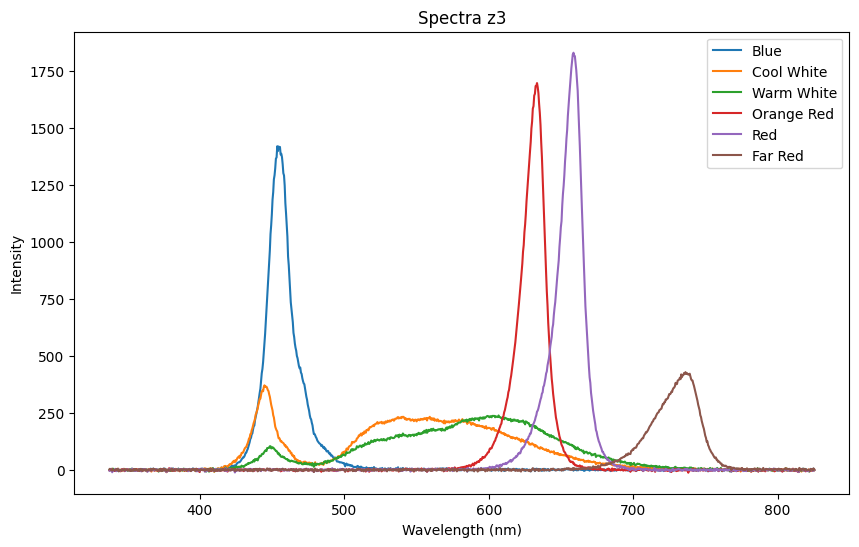

In [51]:
# plot df_z3
plot_unnamed_columns(df_z3, title="Spectra z3")

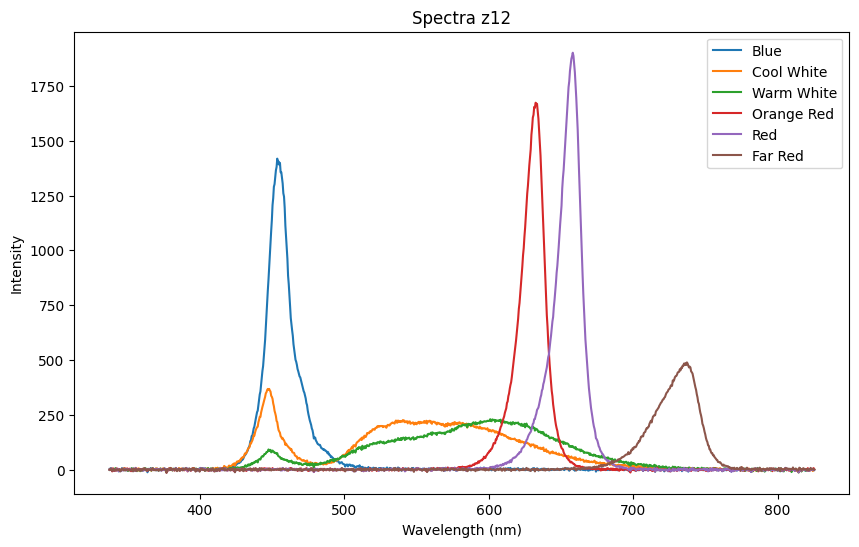

In [52]:
# plot df_z12
plot_unnamed_columns(df_z12, title="Spectra z12")

In [53]:
COLORS = {
    "Blue": "blue",
    "Cool White": "lightgray",
    "Warm White": "orange",
    "Orange Red": "red",
    "Red": "darkred",
    "Far Red": "purple",
}

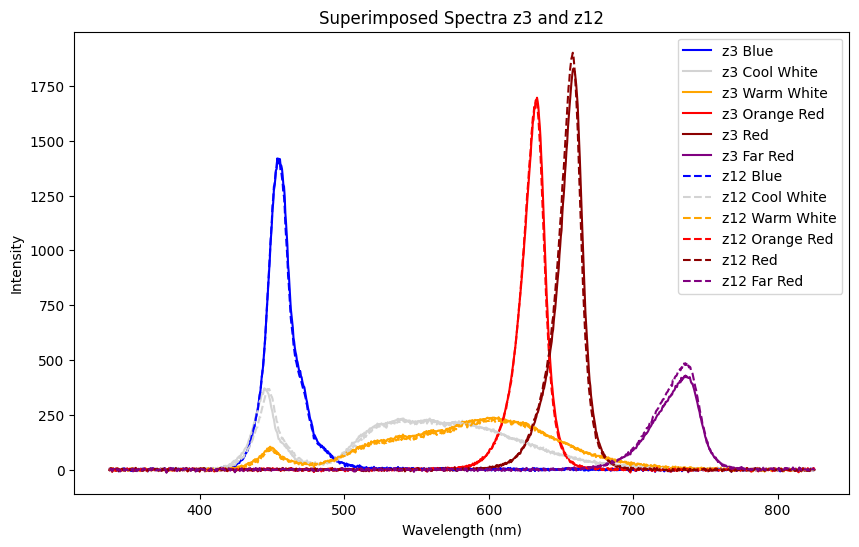

In [54]:
# superimpose the two spectra with different line style same color
plt.figure(figsize=(10, 6))

wavelength_col = None
if wavelength_col is None:
    wavelength_col = df_z3.columns[0]

for col in df_z3.columns:
    if col != wavelength_col:
        plt.plot(
            df_z3[wavelength_col],
            df_z3[col],
            label=f"z3 {col}",
            linestyle="-",
            color=COLORS.get(col, "black"),
        )
for col in df_z12.columns:
    if col != wavelength_col:
        plt.plot(
            df_z12[wavelength_col],
            df_z12[col],
            label=f"z12 {col}",
            linestyle="--",
            color=COLORS.get(col, "black"),
        )

plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.title("Superimposed Spectra z3 and z12")
plt.legend()
plt.show()

In [55]:
import numpy as np


# calculate the integral over the wavelength range 410 nm to 655 nm for each color
def calculate_integral(df, wavelength_col, start_wavelength=410, end_wavelength=655):
    # Filter the DataFrame for the specified wavelength range
    df_filtered = df[
        (df[wavelength_col] >= start_wavelength)
        & (df[wavelength_col] <= end_wavelength)
    ]

    # Calculate the integral using the trapezoidal rule
    integrals = {}
    for col in df_filtered.columns:
        if col != wavelength_col:
            integrals[col] = np.trapz(df_filtered[col], df_filtered[wavelength_col])

    return integrals


df_z3_integrals = calculate_integral(df_z3, wavelength_col)
df_z12_integrals = calculate_integral(df_z12, wavelength_col)
# Print the integrals for each color
print("Integrals for z3:")
for color, integral in df_z3_integrals.items():
    print(f"{color}: {integral:.2f}")
print("\nIntegrals for z12:")
for color, integral in df_z12_integrals.items():
    print(f"{color}: {integral:.2f}")

Integrals for z3:
Blue: 32643.51
Cool White: 35187.19
Warm White: 29886.48
Orange Red: 35506.68
Red: 18033.83
Far Red: 92.79

Integrals for z12:
Blue: 31813.83
Cool White: 33974.37
Warm White: 28181.82
Orange Red: 34710.07
Red: 19543.78
Far Red: 80.40


In [56]:
# Read /workspaces/plant-rl/data/calibration/Plant Chamber Full Calibration - zone3.csv
df_z3_calibration = pd.read_csv(
    "/workspaces/plant-rl/data/calibration/Plant Chamber Full Calibration - zone3.csv"
)
# Read /workspaces/plant-rl/data/calibration/Plant Chamber Full Calibration - zone12.csv
df_z12_calibration = pd.read_csv(
    "/workspaces/plant-rl/data/calibration/Plant Chamber Full Calibration - zone12.csv"
)

# transpose and make first row the header
df_z3_calibration = df_z3_calibration.T
df_z12_calibration = df_z12_calibration.T
# reset index and set first row as header
df_z3_calibration.columns = df_z3_calibration.iloc[0]
df_z3_calibration = df_z3_calibration[1:]
df_z12_calibration.columns = df_z12_calibration.iloc[0]
df_z12_calibration = df_z12_calibration[1:]

In [57]:
df_z3_calibration

Action,Blue,Cool White,Warm White,Orange Red,Red,Far Red
0.10,0,0,0,0,0,0
0.20,0,0,0,0,0,0
0.25,1,1,2,1,0,0
0.30,6,6,6,6,4,0
0.35,14,14,13,13,9,0
0.40,23,22,20,21,16,0
0.50,42,40,34,38,29,0
0.60,59,56,48,55,41,0
0.70,76,72,60,70,52,0
0.80,92,87,72,84,61,0


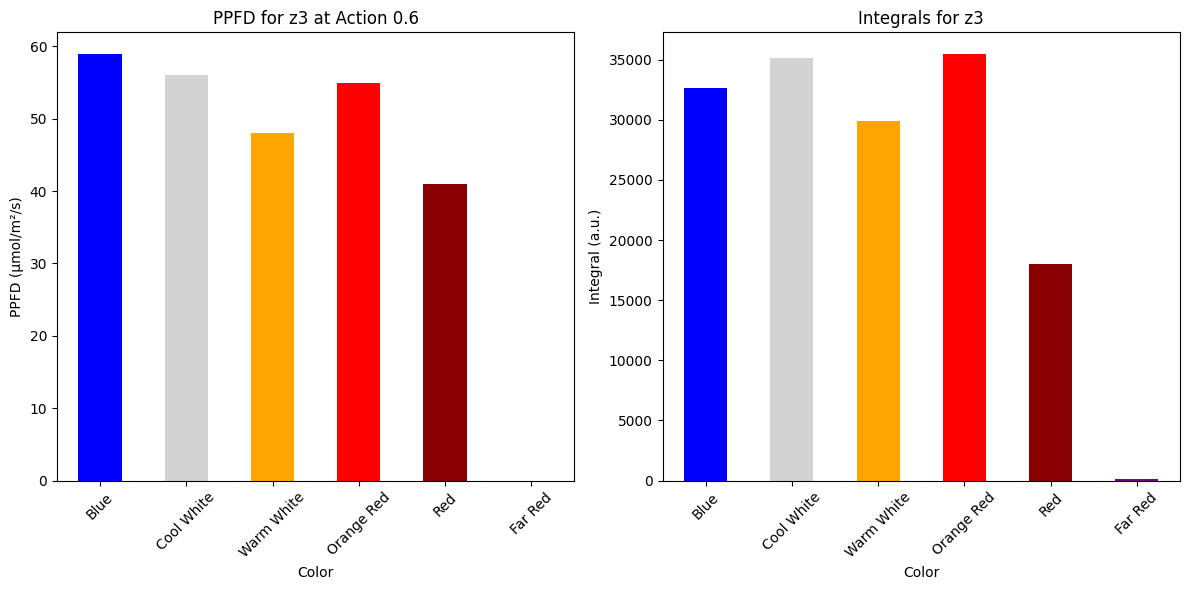

In [58]:
# At Action 0.6 check if df_z3_calibration colors PPFD are the same as df_z3_integrals
# plot bar charts side by side
# x-axis is the Color names (columns)
# y-axis is the PPFD values / SPECTROMETER COUNT

df_z3_6 = df_z3_calibration.iloc[7]
df_z12_6 = df_z12_calibration.iloc[7]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# Plot for z3
df_z3_6.astype(float).plot(
    kind="bar", ax=ax[0], color=[COLORS.get(col, "black") for col in df_z3_6.index]
)
ax[0].set_title("PPFD for z3 at Action 0.6")
ax[0].set_xlabel("Color")
ax[0].set_ylabel("PPFD (µmol/m²/s)")
ax[0].set_xticklabels(df_z3_6.index, rotation=45)
# Plot for z3_integrals
df_z3_integrals_series = pd.Series(df_z3_integrals)
df_z3_integrals_series.plot(
    kind="bar",
    ax=ax[1],
    color=[COLORS.get(col, "black") for col in df_z3_integrals_series.index],
)
ax[1].set_title("Integrals for z3")
ax[1].set_xlabel("Color")
ax[1].set_ylabel("Integral (a.u.)")
ax[1].set_xticklabels(df_z3_integrals_series.index, rotation=45)
plt.tight_layout()
plt.show()

In [59]:
# read tsv
df_z3_far_red = pd.read_csv(
    "/workspaces/plant-rl/data/calibration/RL_FarRedIntensityz3.txt", sep="\t"
)
df_z12_far_red = pd.read_csv(
    "/workspaces/plant-rl/data/calibration/RL_FarRedIntensityz12.txt", sep="\t"
)
df_z3_red = pd.read_csv(
    "/workspaces/plant-rl/data/calibration/RL_RedIntensityz3.txt", sep="\t"
)
df_z12_red = pd.read_csv(
    "/workspaces/plant-rl/data/calibration/RL_RedIntensityz12.txt", sep="\t"
)

In [60]:
df_z3_far_red = df_z3_far_red.drop(df_z3_far_red.columns[-1], axis=1)
df_z12_far_red = df_z12_far_red.drop(df_z12_far_red.columns[-1], axis=1)
df_z3_far_red = df_z3_far_red.drop(df_z3_far_red.columns[1], axis=1)
df_z12_far_red = df_z12_far_red.drop(df_z12_far_red.columns[1], axis=1)
df_z3_red = df_z3_red.drop(df_z3_red.columns[-1], axis=1)
df_z12_red = df_z12_red.drop(df_z12_red.columns[-1], axis=1)
df_z3_red = df_z3_red.drop(df_z3_red.columns[1], axis=1)
df_z12_red = df_z12_red.drop(df_z12_red.columns[1], axis=1)


# drop odd columns
def drop_columns(df, columns_to_drop):
    return df.drop(df.columns[columns_to_drop], axis=1)


df_z3_far_red = drop_columns(df_z3_far_red, range(1, df_z3_far_red.shape[1], 2))
df_z12_far_red = drop_columns(df_z12_far_red, range(1, df_z12_far_red.shape[1], 2))
df_z3_red = drop_columns(df_z3_red, range(1, df_z3_red.shape[1], 2))
df_z12_red = drop_columns(df_z12_red, range(1, df_z12_red.shape[1], 2))

In [ ]:
df_z12_red.columns

Index(['S17176_1:101', 'Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9',
       'Unnamed: 11', 'Unnamed: 13', 'Unnamed: 15', 'Unnamed: 17',
       'Unnamed: 19', 'Unnamed: 21', 'Unnamed: 23', 'Unnamed: 25',
       'Unnamed: 27', 'Unnamed: 29', 'Color'],
      dtype='object')

In [71]:
# rename columns
df_z3_far_red.columns = [
    "Wavelength",
    0.10,
    0.20,
    0.25,
    0.30,
    0.35,
    0.40,
    0.50,
    0.60,
    0.70,
    0.80,
    0.85,
    0.90,
    0.95,
    1.00,
]
df_z12_far_red.columns = [
    "Wavelength",
    0.10,
    0.20,
    0.25,
    0.30,
    0.35,
    0.40,
    0.50,
    0.60,
    0.70,
    0.80,
    0.85,
    0.90,
    0.95,
    1.00,
]
df_z3_red.columns = [
    "Wavelength",
    0.25,
    0.30,
    0.35,
    0.40,
    0.50,
    0.60,
    0.70,
    0.80,
    0.85,
    0.90,
    0.95,
    1.00,
]
df_z12_red.columns = [
    "Wavelength",
    0.10,
    0.20,
    0.25,
    0.30,
    0.35,
    0.40,
    0.50,
    0.60,
    0.70,
    0.80,
    0.85,
    0.90,
    0.95,
    1.00,
]

In [72]:
df_z3_far_red["Color"] = "Far Red"
df_z12_far_red["Color"] = "Far Red"

df_z3_red["Color"] = "Red"
df_z12_red["Color"] = "Red"

In [76]:
# Convert columns: 0.1, 0.2, ..., 1.0 to new rows with Column: Action, Value: 0.1, 0.2, ..., 1.0
def convert_columns_to_rows(df, wavelength_col):
    # Melt the DataFrame to convert columns to rows
    df_melted = df.melt(
        id_vars=[wavelength_col, "Color"], var_name="Action", value_name="Value"
    )
    return df_melted


df_z3_far_red_melted = convert_columns_to_rows(df_z3_far_red, "Wavelength")
df_z12_far_red_melted = convert_columns_to_rows(df_z12_far_red, "Wavelength")
df_z3_red_melted = convert_columns_to_rows(df_z3_red, "Wavelength")
df_z12_red_melted = convert_columns_to_rows(df_z12_red, "Wavelength")

In [77]:
df_z3_far_red_melted

,Wavelength,Color,Action,Value
0,337.498,Far Red,0.1,6.0
1,337.947,Far Red,0.1,6.0
2,338.397,Far Red,0.1,3.0
3,338.846,Far Red,0.1,-1.0
4,339.295,Far Red,0.1,-2.0
...,...,...,...,...
14331,823.322,Far Red,1.0,5.0
14332,823.811,Far Red,1.0,10.0
14333,824.301,Far Red,1.0,5.0
14334,824.791,Far Red,1.0,9.0


In [96]:
# 	Wavelength	Color	Action	Value
# 0	337.498	Far Red	0.1	6.0
# 1	337.947	Far Red	0.1	6.0
# 2	338.397	Far Red	0.1	3.0
# 3	338.846	Far Red	0.1	-1.0
# 4	339.295	Far Red	0.1	-2.0
# ...	...	...	...	...
# 14331	823.322	Far Red	1.0	5.0
# 14332	823.811	Far Red	1.0	10.0
# 14333	824.301	Far Red	1.0	5.0
# 14334	824.791	Far Red	1.0	9.0
# 14335	825.281	Far Red	1.0	4.0

# Calculate the integral over the wavelength range 410 nm to 655 nm for each Action
def calculate_integral_per_action(
    df, wavelength_col, start_wavelength=410, end_wavelength=655
):
    # Filter the DataFrame for the specified wavelength range
    df_filtered = df[
        (df[wavelength_col] >= start_wavelength)
        & (df[wavelength_col] <= end_wavelength)
    ]

    # Group by Action and calculate the integral using the trapezoidal rule
    integrals = (
        df_filtered.groupby("Action")
        .apply(lambda x: np.trapz(x["Value"], x[wavelength_col]))
        .reset_index()
    )
    integrals.columns = ["Action", "Integral"]

    return integrals


df_z3_far_red_integrals = calculate_integral_per_action(
    df_z3_far_red_melted, "Wavelength", start_wavelength=410, end_wavelength=10000
)
df_z12_far_red_integrals = calculate_integral_per_action(
    df_z12_far_red_melted, "Wavelength", start_wavelength=410, end_wavelength=10000
)
df_z3_red_integrals = calculate_integral_per_action(df_z3_red_melted, "Wavelength")
df_z12_red_integrals = calculate_integral_per_action(df_z12_red_melted, "Wavelength")

/tmp/ipykernel_2509553/1626078657.py:20: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  integrals = df_filtered.groupby('Action').apply(lambda x: np.trapz(x['Value'], x[wavelength_col])).reset_index()
/tmp/ipykernel_2509553/1626078657.py:20: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  integrals = df_filtered.groupby('Action').apply(lambda x: np.trapz(x['Value'], x[wavelength_col])).reset_index()
/tmp/ipykernel_25095

In [81]:
df_z3_red_integrals

,Action,Integral
0,0.25,-8.57350
1,0.30,1728.84725
2,0.35,4451.50600
3,0.40,7103.07300
4,0.50,12781.47175
5,0.60,18248.29300
6,0.70,22856.88450
7,0.80,27305.21325
8,0.85,28790.41275
9,0.90,29839.56425


In [83]:
df_z3_calibration

Action,Blue,Cool White,Warm White,Orange Red,Red,Far Red
0.10,0,0,0,0,0,0
0.20,0,0,0,0,0,0
0.25,1,1,2,1,0,0
0.30,6,6,6,6,4,0
0.35,14,14,13,13,9,0
0.40,23,22,20,21,16,0
0.50,42,40,34,38,29,0
0.60,59,56,48,55,41,0
0.70,76,72,60,70,52,0
0.80,92,87,72,84,61,0


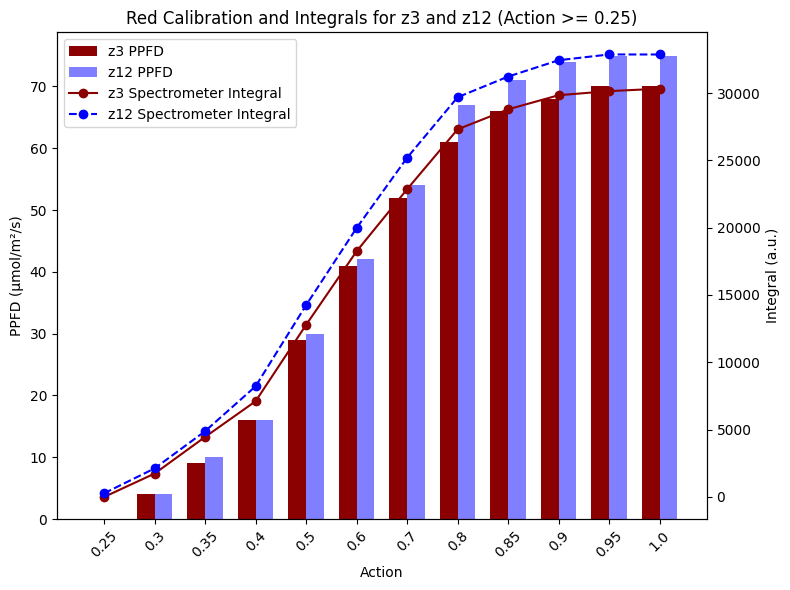

In [ ]:
# Only plot when Action >= 0.25

# Filter calibration DataFrames for Action >= 0.25
calib_actions = df_z3_calibration.index.astype(float)
calib_mask = calib_actions >= 0.25
df_z3_calib_red = df_z3_calibration.loc[calib_mask, "Red"].astype(float)
df_z12_calib_red = df_z12_calibration.loc[calib_mask, "Red"].astype(float)

# Filter integrals DataFrames for Action >= 0.25
df_z3_red_integrals_filtered = df_z3_red_integrals[
    df_z3_red_integrals["Action"] >= 0.25
]
df_z12_red_integrals_filtered = df_z12_red_integrals[
    df_z12_red_integrals["Action"] >= 0.25
]

fig, ax1 = plt.subplots(figsize=(8, 6))

# Bar width for grouped bars
bar_width = 0.35
actions = df_z3_calib_red.index.astype(float)
x = np.arange(len(actions))

# Plot calibration values
ax1.bar(
    x - bar_width / 2,
    df_z3_calib_red.values,
    width=bar_width,
    color=COLORS["Red"],
    label="z3 PPFD",
)
ax1.bar(
    x + bar_width / 2,
    df_z12_calib_red.values,
    width=bar_width,
    color="blue",
    alpha=0.5,
    label="z12 PPFD",
)
ax1.set_xlabel("Action")
ax1.set_ylabel("PPFD (µmol/m²/s)")
ax1.set_xticks(x)
ax1.set_xticklabels(actions, rotation=45)

# Plot integrals on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(
    x,
    df_z3_red_integrals_filtered["Integral"].values,
    color=COLORS["Red"],
    marker="o",
    label="z3 Spectrometer Integral",
)
ax2.plot(
    x,
    df_z12_red_integrals_filtered["Integral"].values,
    color="blue",
    marker="o",
    linestyle="--",
    label="z12 Spectrometer Integral",
)
ax2.set_ylabel("Integral (a.u.)")

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.title("Red Calibration and Integrals for z3 and z12 (Action >= 0.25)")
plt.tight_layout()
plt.show()

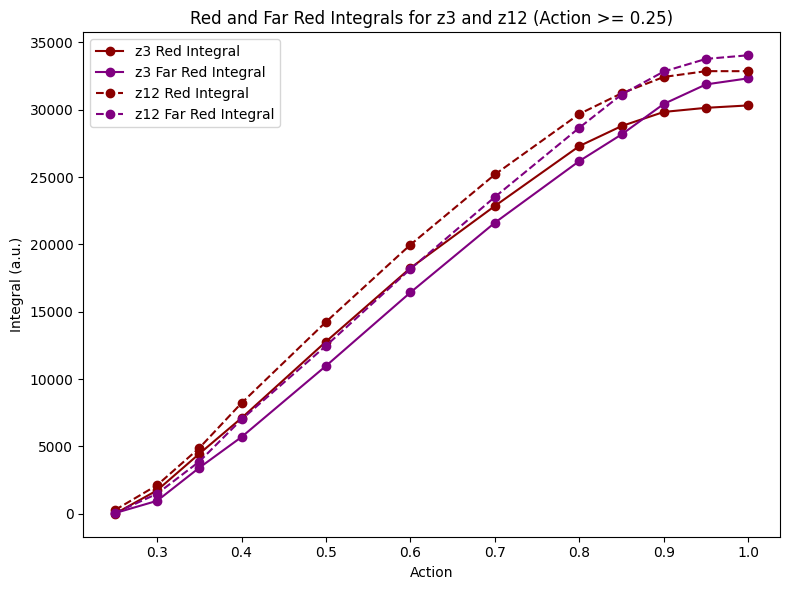

In [ ]:
# Plot Red and Far Red integrals for z3 and z12 to check correlation

fig, ax = plt.subplots(figsize=(8, 6))

# Filter integrals DataFrames for Action >= 0.25
df_z3_far_red_integrals_filtered = df_z3_far_red_integrals[
    df_z3_far_red_integrals["Action"] >= 0.25
]
df_z12_far_red_integrals_filtered = df_z12_far_red_integrals[
    df_z12_far_red_integrals["Action"] >= 0.25
]

# Plot z3
ax.plot(
    df_z3_red_integrals_filtered["Action"],
    df_z3_red_integrals_filtered["Integral"],
    marker="o",
    color=COLORS["Red"],
    label="z3 Red Integral",
)
ax.plot(
    df_z3_far_red_integrals_filtered["Action"],
    df_z3_far_red_integrals_filtered["Integral"],
    marker="o",
    color=COLORS["Far Red"],
    label="z3 Far Red Integral",
)

# Plot z12
ax.plot(
    df_z12_red_integrals_filtered["Action"],
    df_z12_red_integrals_filtered["Integral"],
    marker="o",
    linestyle="--",
    color=COLORS["Red"],
    label="z12 Red Integral",
)
ax.plot(
    df_z12_far_red_integrals_filtered["Action"],
    df_z12_far_red_integrals_filtered["Integral"],
    marker="o",
    linestyle="--",
    color=COLORS["Far Red"],
    label="z12 Far Red Integral",
)

ax.set_xlabel("Action")
ax.set_ylabel("Integral (a.u.)")
ax.set_title("Red and Far Red Integrals for z3 and z12 (Action >= 0.25)")
ax.legend()
plt.tight_layout()
plt.show()

In [101]:
df_z3_far_red

,Wavelength,0.1,0.2,0.25,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95,1.0,Color
0,337.498,6.0,2.0,-4.0,3.0,-1.0,-2.0,-2.0,1.0,3.0,-3,2.0,-1.0,3,1.0,Far Red
1,337.947,6.0,3.0,-1.0,-1.0,0.0,1.0,0.0,3.0,-1.0,0,2.0,-2.0,0,1.0,Far Red
2,338.397,3.0,0.0,5.0,0.0,4.0,4.0,4.0,2.0,2.0,2,0.0,2.0,-1,2.0,Far Red
3,338.846,-1.0,-4.0,0.0,-1.0,1.0,1.0,-1.0,-2.0,2.0,-3,-3.0,-1.0,0,-2.0,Far Red
4,339.295,-2.0,-3.0,-7.0,-4.0,1.0,-7.0,-5.0,-5.0,-3.0,-5,-3.0,-8.0,-8,3.0,Far Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,823.322,1.0,5.0,0.0,0.0,1.0,4.0,2.0,4.0,3.0,6,2.0,3.0,5,5.0,Far Red
1020,823.811,1.0,1.0,-1.0,5.0,0.0,3.0,8.0,4.0,6.0,8,7.0,4.0,5,10.0,Far Red
1021,824.301,0.0,-1.0,-3.0,0.0,-3.0,-4.0,2.0,-1.0,-1.0,-6,1.0,-2.0,1,5.0,Far Red
1022,824.791,5.0,3.0,3.0,0.0,0.0,0.0,0.0,2.0,5.0,8,4.0,6.0,10,9.0,Far Red


/tmp/ipykernel_2509553/1947835309.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  categorical_cmap = cm.get_cmap('tab20', len(actions))


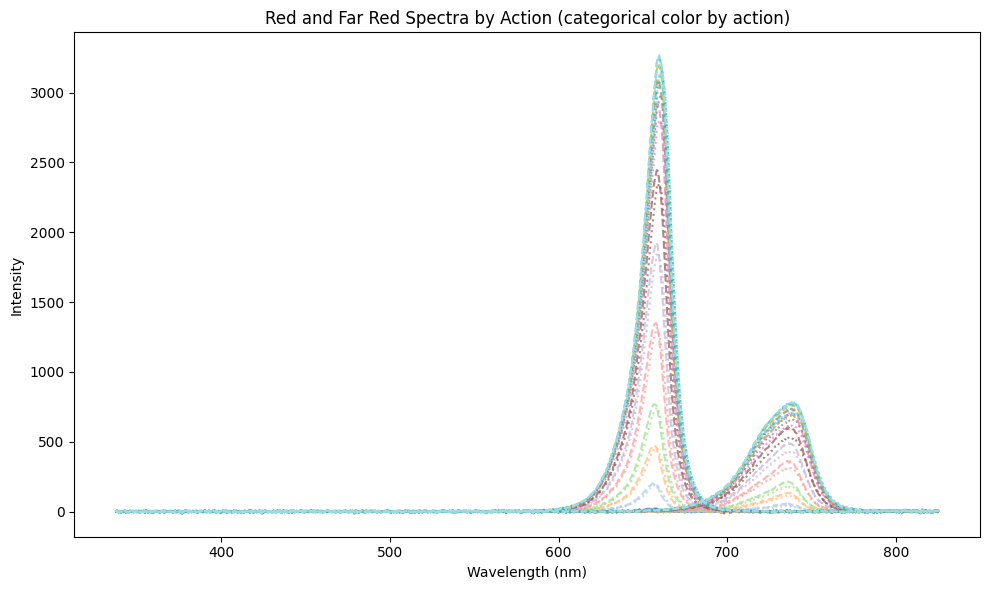

In [104]:
import matplotlib.cm as cm

plt.figure(figsize=(10, 6))

# Use a categorical colormap for actions
categorical_cmap = cm.get_cmap("tab20", len(actions))
action_colors = {a: categorical_cmap(i) for i, a in enumerate(actions)}

for action in actions:
    # For Far Red
    if action in df_z3_far_red.columns:
        plt.plot(
            df_z3_far_red["Wavelength"],
            df_z3_far_red[action],
            linestyle=":",
            color=action_colors[action],
            alpha=0.7 if action != 1.0 else 1.0,
            label=f"z3 Far Red {action}" if action == actions[0] else None,
        )
    if action in df_z12_far_red.columns:
        plt.plot(
            df_z12_far_red["Wavelength"],
            df_z12_far_red[action],
            linestyle="--",
            color=action_colors[action],
            alpha=0.7 if action != 1.0 else 1.0,
            label=f"z12 Far Red {action}" if action == actions[0] else None,
        )
    # For Red
    if action in df_z3_red.columns:
        plt.plot(
            df_z3_red["Wavelength"],
            df_z3_red[action],
            linestyle=":",
            color=action_colors[action],
            alpha=0.7 if action != 1.0 else 1.0,
            label=f"z3 Red {action}" if action == actions[0] else None,
        )
    if action in df_z12_red.columns:
        plt.plot(
            df_z12_red["Wavelength"],
            df_z12_red[action],
            linestyle="--",
            color=action_colors[action],
            alpha=0.7 if action != 1.0 else 1.0,
            label=f"z12 Red {action}" if action == actions[0] else None,
        )

plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.title("Red and Far Red Spectra by Action (categorical color by action)")
plt.tight_layout()
plt.show()